PROPERTY PRICE PREDICITON

Problem Objective :
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

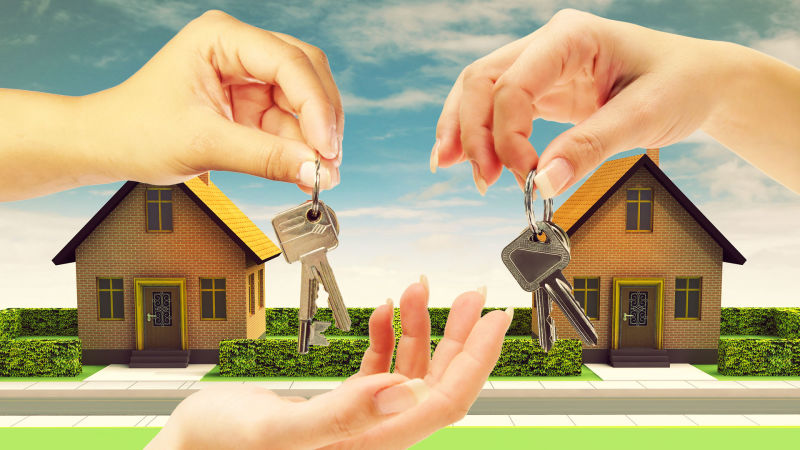

In [1]:
import IPython
IPython.display.Image('https://i-media.vyaparify.com/vcards/blogs/95898/Buysell1.jpg')

STEP 1 : IMPORT LIBRARIES 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
import os 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  #root_mean_squared_error 
from sklearn.datasets import fetch_california_housing 

warnings.filterwarnings('ignore')
print('modules loaded successfully')


modules loaded successfully


STEP 2 : LOAD DATA CREATE DF 

In [3]:
data_dict = fetch_california_housing()
data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
data_dict['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
df = pd.DataFrame(data_dict['data'],columns = data_dict['feature_names'])
df['MedHouseVal']=data_dict['target']
print('data loaded successfully')

data loaded successfully


STEP 3 : UNDERSTANDING DATA USING EDA 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
15246,6.8443,30.0,5.491582,1.043771,665.0,2.239057,33.0,-117.31,4.925


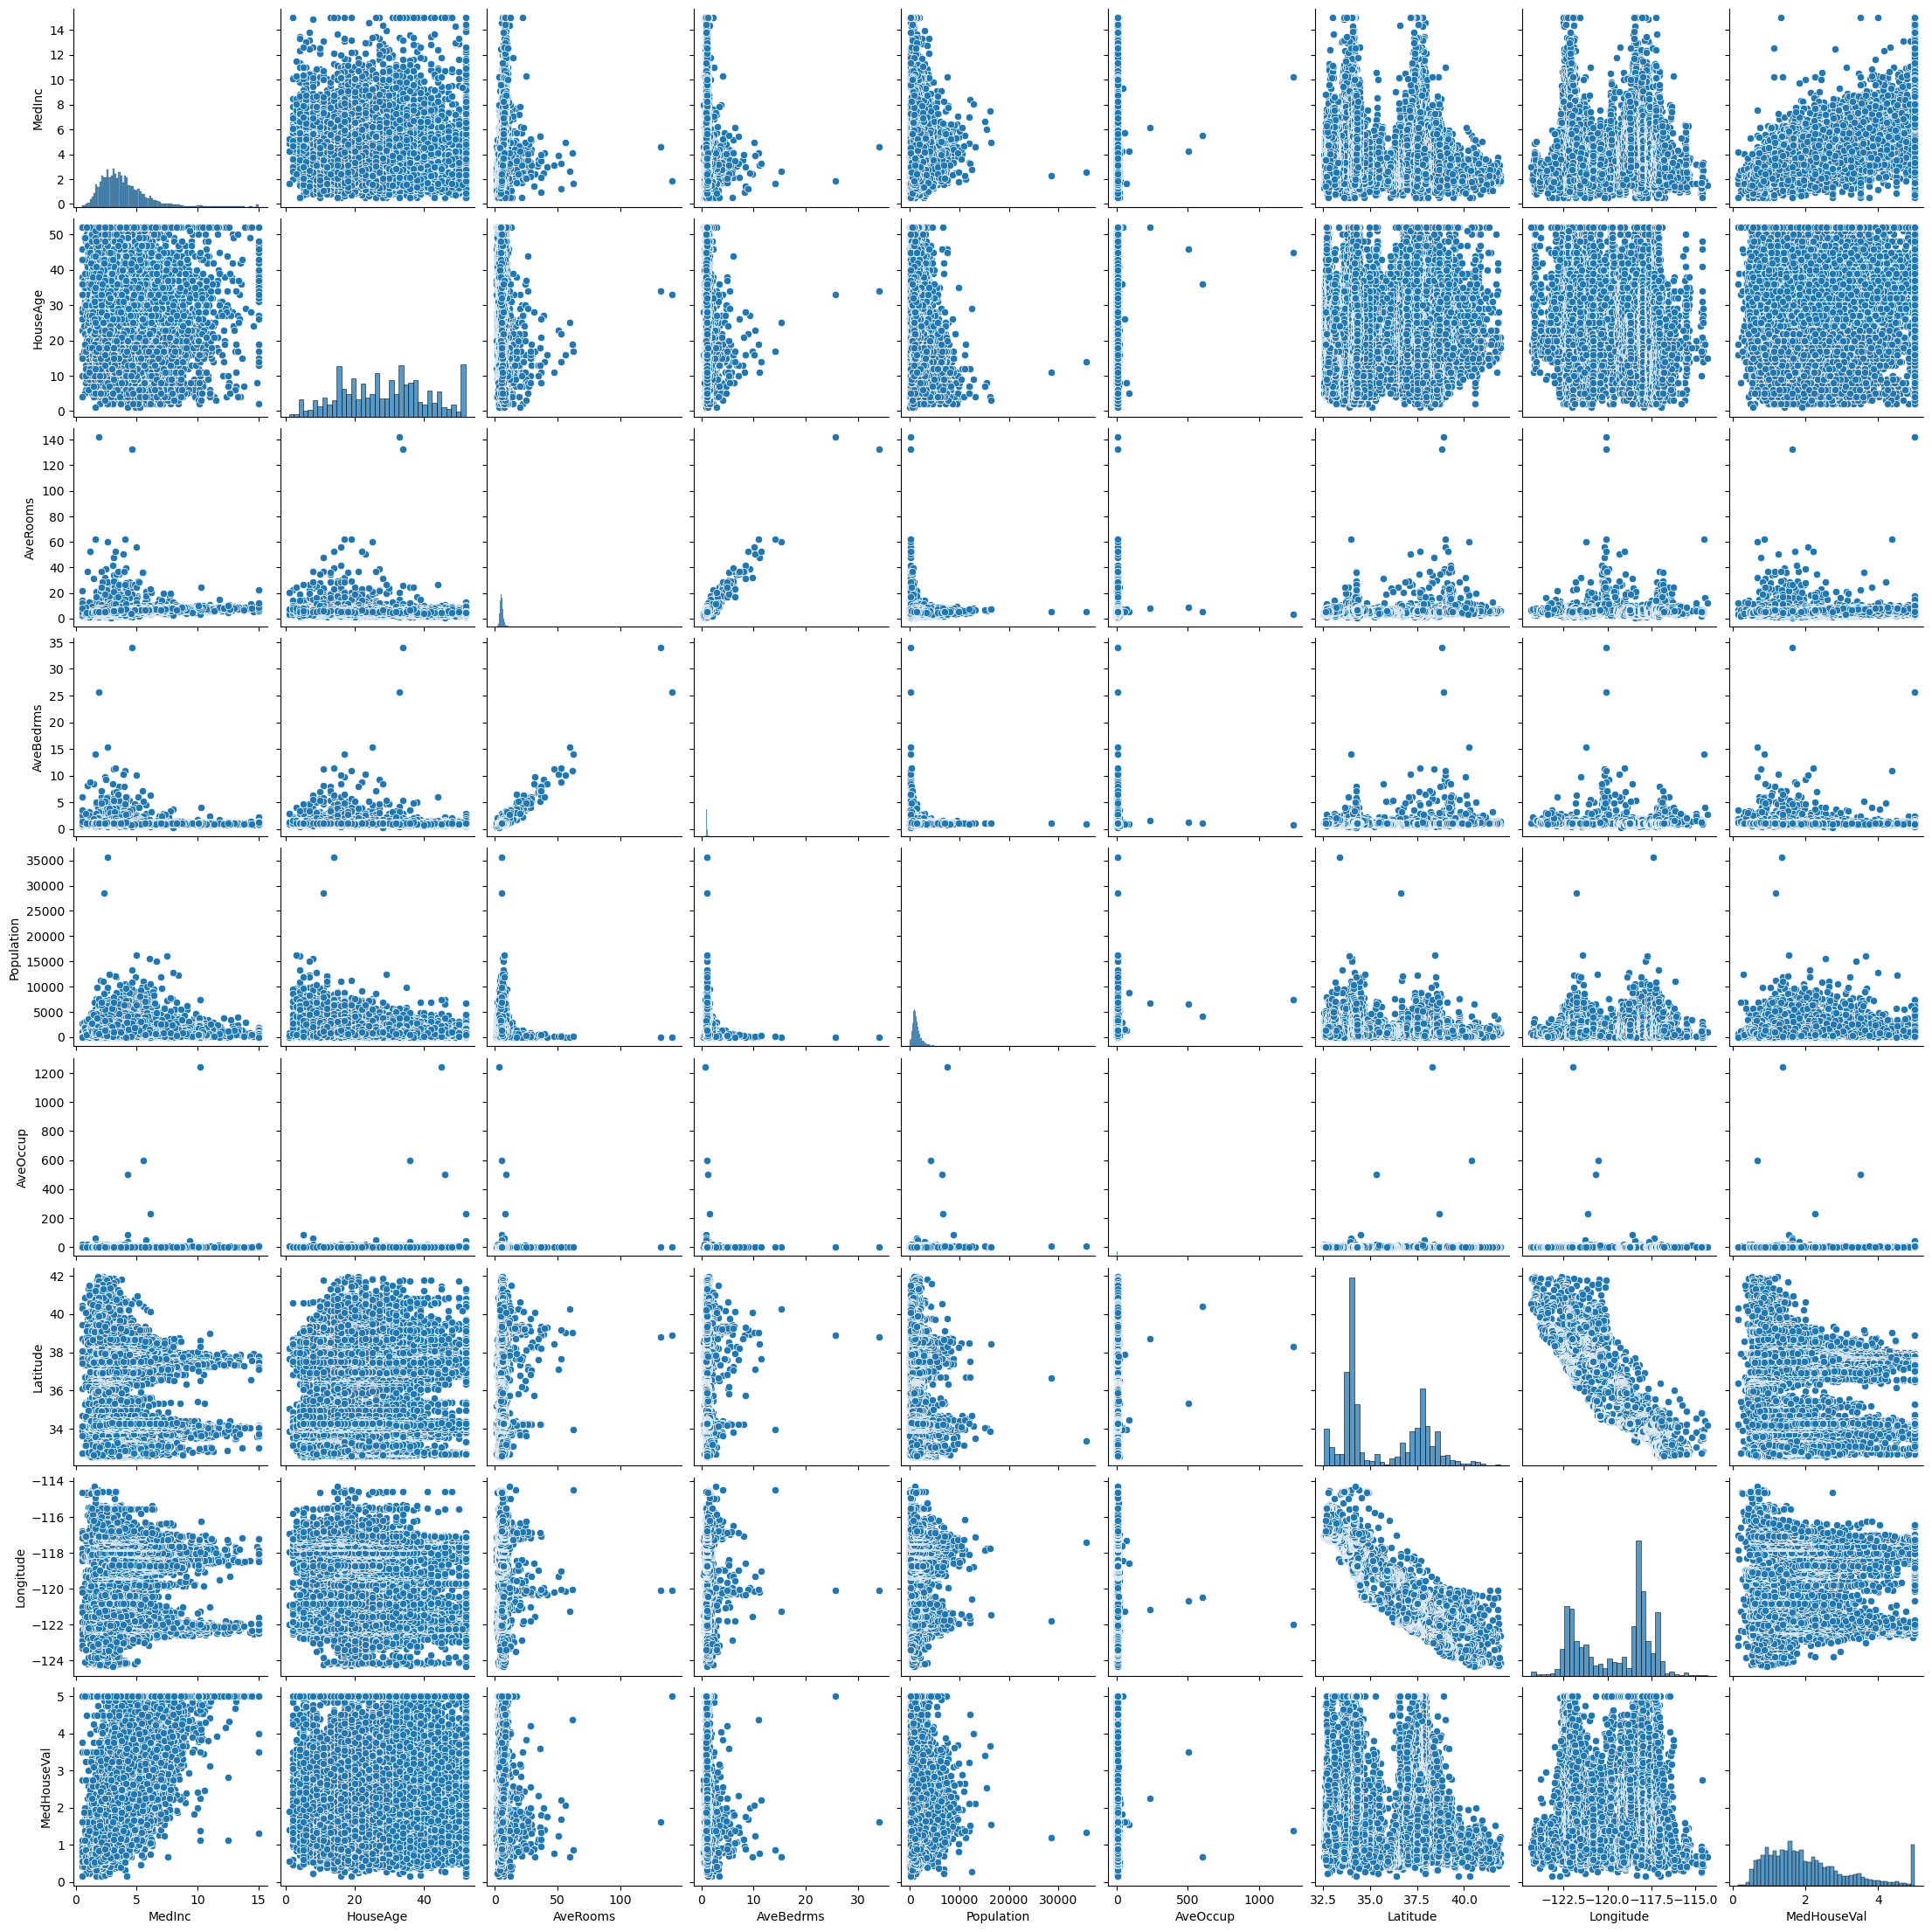

In [10]:
sns.pairplot(data=df,corner=False)
plt.show()

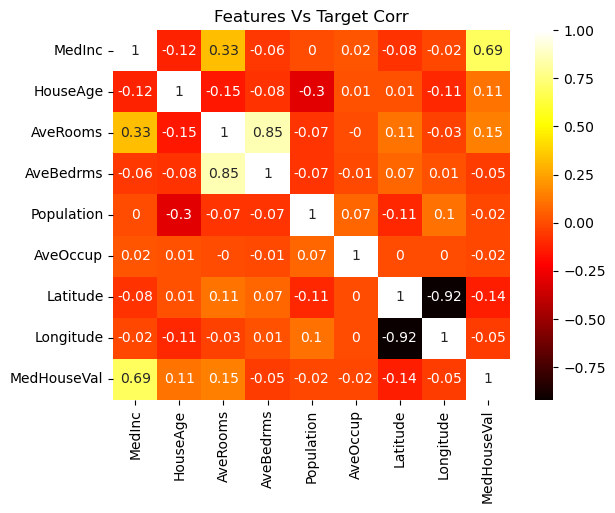

In [11]:
plt.title('Features Vs Target Corr')
sns.heatmap(df.corr().round(2),annot = True, cmap = 'hot')
plt.show()

In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


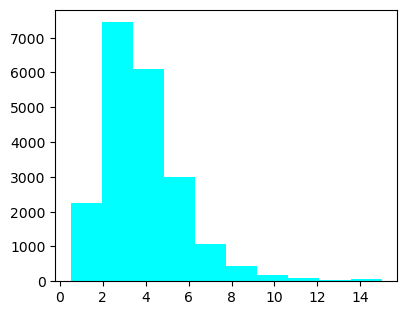

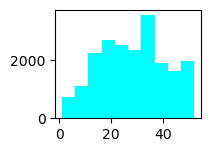

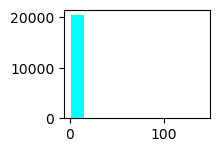

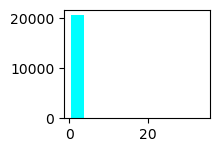

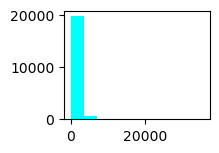

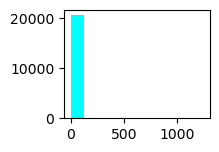

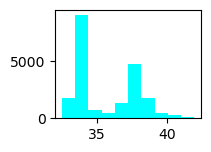

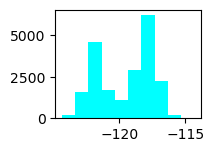

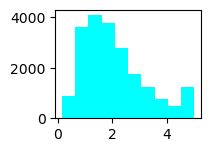

In [13]:
plt.figure(figsize = (15,12))
for i, j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[j],color = 'cyan')
    plt.show()
    

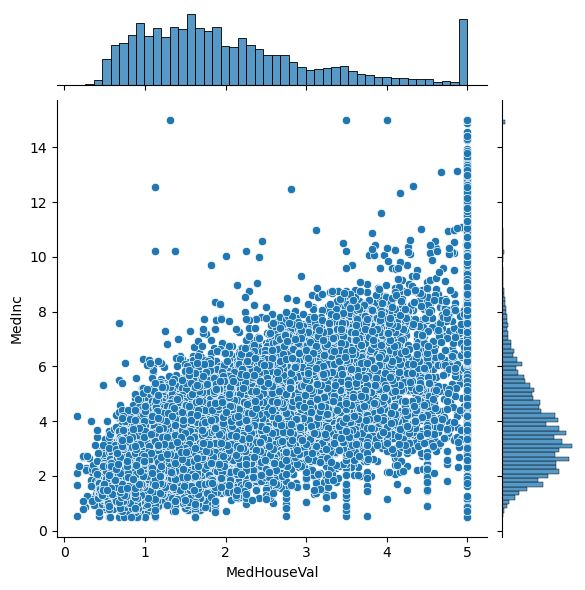

In [14]:
sns.jointplot(data=df,x = 'MedHouseVal',y = 'MedInc')

<Axes: xlabel='MedHouseVal', ylabel='MedInc'>

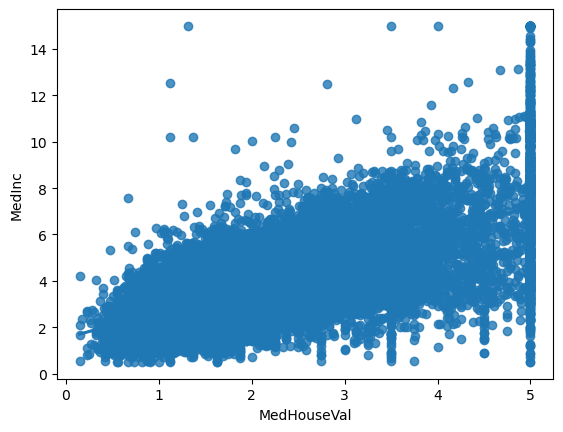

In [15]:
sns.regplot(data=df,x = 'MedHouseVal',y = 'MedInc')

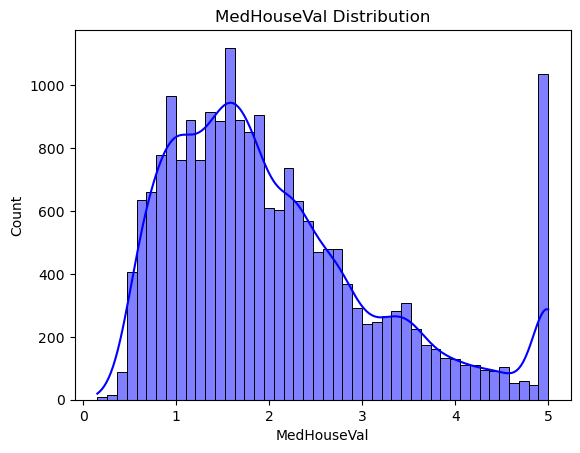

In [16]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b',kde= True)
plt.show()

In [22]:
df['MedHouseVal'].describe()
# 75% pof the price is less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

STEP 4 : FEATURE ENGINEERING AND PRE PROCESSING 

In [27]:
# CONVERT DATA INTO SAME SCALE FOR BETTER PREDICTION

In [28]:
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
y = df['MedHouseVal']
scaler = MinMaxScaler()
scaler.fit(X) # learning : fit data in 0 anmd 1 
x_scale=scaler.transform(X)
print('done')


done


In [29]:
print(x_scale.min())
print(x_scale.max())

0.0
1.0000000000000002


STEP 5 : TRAIN TEST SPLIT : SPLIT DATA FOR TRAINING AND TESTING PART


In [30]:
# Train test Split: Divide into train Part Test Part
# train_test_split: Func: divide


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scale,y,test_size=.2, random_state= 150 )
print('Done')

Done


In [31]:
b,a,c,d = [23,534,6,65] # Unpacking
print(a)

534


In [32]:
import random
random.seed(56)
random.randint(1,50)

36

In [33]:
print('Shape of Xtrain',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)


Shape of Xtrain (16512, 8)
Shape of X_test (4128, 8)
Shape of y_train (16512,)
Shape of y_test (4128,)


In [34]:
x_scale.shape

(20640, 8)

In [35]:
df.shape

(20640, 9)

STEP 6 : MODEL BUILDING 

In [36]:
# STEP 6.1 LINEAR MODEL USING LINEAR REGRESSION 

In [37]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Object Creation

lr_model.fit(X_train,y_train) # Trainig Model

LinearRegression()

In [38]:
#STEP 6.1.2: MODEL PREDICTION

In [39]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

Done


In [40]:
# 20 %: Actual answer: y_test, Predcited: y_pred

lr_compare_df = pd.DataFrame({'Actual House price':y_test,
             'Predicted House price':y_pred})

print('Done')

Done


In [41]:
lr_compare_df

,Actual House price,Predicted House price
13569,0.93300,1.600182
6743,2.79900,2.290845
13230,3.92900,2.618237
18799,0.52000,0.209449
1052,1.23600,1.236397
...,...,...
19369,2.68800,2.276322
12808,0.69300,0.976300
6589,5.00001,3.410402
19719,0.71200,0.896588


In [42]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 0.5295622016018944


In [43]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 0.532217053983186


In [44]:
lr_rmse = lr_mse**.5

print('Lr RMSE',lr_rmse)

Lr RMSE 0.729532078789676


In [45]:
# Trainig Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('testing Score',lr_test_score)


Training Score 0.6081032361747606
testing Score 0.5984024263886711


In [46]:
# STEP 6.1.3: CHECKING VIF AND DROP COLUMN IF VALUE VIF>10

In [47]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15107,0.054316,0.803922,0.016327,0.029027,0.022955,0.00174,0.158342,0.603586


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']  = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
8821,0.199466,0.490196,0.021385,0.020053,0.017293,0.001073,0.503719,0.236056,1


In [49]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending= False)

# Because Latitude and Longitude has high corr and vif close to 10 we can drop one or both

,Features,VIF factor
8,Intercept,177.876568
6,Latitude,9.316394
7,Longitude,8.977028
2,AveRooms,8.752272
3,AveBedrms,7.460090
0,MedInc,2.459841
1,HouseAge,1.240290
4,Population,1.136960
5,AveOccup,1.009297


In [50]:
col = list(X.columns)
col.remove('Latitude')

# print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
13398,0.267996,0.45098,0.030278,0.024231,0.027131,0.001312,0.59761


In [82]:
def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model



In [52]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.543073,0.531162,0.570342,0.621327,0.788243,0.531162


In [53]:
from sklearn.linear_model import Lasso, Ridge

In [54]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000009,0.904335,1.325262,1.1512,-0.000009


In [55]:
ml_model = Ridge

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.52581,0.513927,0.59007,0.644168,0.802601,0.513927


In [56]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [83]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [84]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model = built_model(Ridge,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)

    display(temp_df)
    break

  display(clear=True)

Score is: 0.6067450510265391
Best random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


In [85]:
final_model

Ridge()

STEP 7 : SAVE MODEL AND EXTRA OBJECTS  

In [86]:
import pickle

with open('house_price_pred_ridge_model.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and Scaller Saved Successfully!!')

ML model and Scaller Saved Successfully!!


In [60]:
print('123')

123


STEP 8 : WEBSITE BUIDING AND LOCAL HOST 

In [63]:
#pip install streamlit

In [64]:
import streamlit as s 
print('done')


done


In [65]:
#st.title('California Housing Price Prediction')

In [66]:
# !: Represents run this code in terminal 

In [71]:
os.getcwd()

'C:\\Users\\RACHIT SPARSH'

In [72]:
col

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Longitude']

In [81]:
df[col]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,-121.32


In [76]:
df.to_csv('california.csv')
print('done')

done


In [77]:
for i in df[col]:
    min_value , max_value =df[i].agg(['min','max'])
    print('min',i,min_value)
    print('max',i,max_value)

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333
min Longitude -124.35
max Longitude -114.31


In [ ]:
temp_df = pd.read_csv('california.csv')
for i in temp_df[col]:
    min_value,max_value=temp_df[i].agg(['min','max'])
    var =st.sidebar.slider('Select{i} range',min_value,max_value,random.randint(min_value,max_value))

STEP 9 : LIVE DEPLOYMENT USING STREAMLIT

In [118]:
# import streamlit as st
# import pandas as pd
# import random
# from sklearn.preprocessing import StandardScaler
# # import pickle
# import time

In [119]:
#GITHUB : FOLDER HPUSING PRICDE PROJECT
#REQQUIREMENTS .TXT = WE WILL WRITE THOSE MODULES WHICHJ IS IMPORTANT FOR APP.pY TO RUN 



In [121]:
pd.__version__

'2.2.3'

In [122]:
st.__version__

'1.45.1'

In [123]:
import 

AttributeError: module 'random' has no attribute '__version__'